In [67]:
import sys
sys.path.insert(0,'python')
from classification import *
from readSent import *
import pylab as plt
import numpy as np
from fastRWpkl import *
import scipy.stats
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde
from scipy import optimize
from scipy import interpolate, ndimage
%matplotlib inline 
import scipy.misc
from smoothn import *
import tifffile as tiff
from scipy.ndimage.morphology import binary_dilation as bd

In [109]:
bands = readfile([2, 4], 'data/50SMG20165100' )

data/50SMG20165100auxiliaryECMWFT
data/50SMG20165100metadata.xml


In [110]:
b2 = bands['B02']
b4 = bands['B04']

In [4]:
cm = parallel_rw_pkl(None, '0510diacm', 'r')
rr,cc = np.where(~cm)

In [31]:
def cost(p):
    p1, p2, p3  = p
    tc = p1*b2[rr,cc]-p2*b4[rr,cc]
    cl = tc<tc.mean()-p3*tc.std()
    clpix = [rr[cl], cc[cl]]
    r = scipy.stats.linregress(b4[clpix[0], clpix[1]],b2[clpix[0], clpix[1]])
    print p, r
    return 1-r.rvalue

In [32]:
p = np.array([14209.00539339, 6348.77515664, 0.5])
psolve = optimize.fmin(cost, p, full_output=1)

[  1.42090054e+04   6.34877516e+03   5.00000000e-01] LinregressResult(slope=0.40778831574461855, intercept=0.0904411827513973, rvalue=0.98478034339297627, pvalue=0.0, stderr=1.222425834980565e-05)
[  1.49194557e+04   6.34877516e+03   5.00000000e-01] LinregressResult(slope=0.39598360210687694, intercept=0.091833330830195153, rvalue=0.98565604170209675, pvalue=0.0, stderr=1.1469841019810553e-05)
[  1.42090054e+04   6.66621391e+03   5.00000000e-01] LinregressResult(slope=0.41892181383166499, intercept=0.089083202861380953, rvalue=0.98292267049177473, pvalue=0.0, stderr=1.3461078187078784e-05)
[  1.42090054e+04   6.34877516e+03   5.25000000e-01] LinregressResult(slope=0.40796104490603496, intercept=0.09030501538283639, rvalue=0.9850516037570497, pvalue=0.0, stderr=1.2329010519087249e-05)
[  1.46826389e+04   6.03133640e+03   5.16666667e-01] LinregressResult(slope=0.38749082580368477, intercept=0.092735556279558262, rvalue=0.98605085801323178, pvalue=0.0, stderr=1.1187479696936458e-05)
[  1.

In [33]:
psolve

(array([  1.41283864e+04,   5.41603017e+03,   1.06467703e+00]),
 0.0088085733923898291,
 73,
 187,
 0)

In [38]:
tc = 14128.3864*b2[rr,cc]- 5416.03017*b4[rr,cc]
cl = tc<tc.mean()-1.06467703*tc.std()
clpix = [rr[cl], cc[cl]]

In [70]:
r = scipy.stats.linregress(b2[clpix[0], clpix[1]],b4[clpix[0], clpix[1]])
print r

LinregressResult(slope=2.6773049767942889, intercept=-0.24470580852854693, rvalue=0.99119142660761017, pvalue=0.0, stderr=0.00011158499484697331)


In [41]:
arc = np.arctan(r.slope)

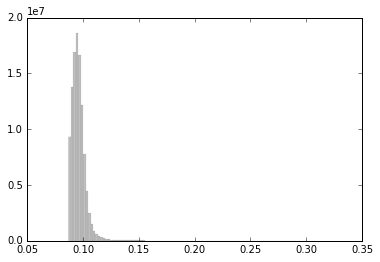

In [36]:
arc = np.arctan(r.slope)
hzpix = [rr[~cl], cc[~cl]]
hot = np.sin(arc)*b2[hzpix[0], hzpix[1]] - np.cos(arc)*b4[hzpix[0], hzpix[1]]
hist = plt.hist(hot.ravel(), 100, color='gray', alpha=0.5, linewidth=0.1)

In [42]:
clhot = np.sin(arc)*b2[clpix[0], clpix[1]] - np.cos(arc)*b4[clpix[0], clpix[1]]
hist = plt.hist(clhot, 100, color='gray', alpha=0.5, linewidth=0.1)
print (clhot).mean()

0.0856224056364


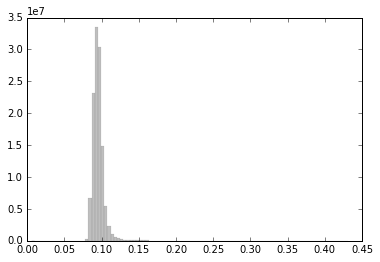

In [71]:
arc = np.arctan(r.slope)
hot = np.sin(arc)*b2 - np.cos(arc)*b4
hist = plt.hist(hot.ravel(), 100, color='gray', alpha=0.5, linewidth=0.1)

In [74]:
parallel_rw_pkl(hot, 'hot', 'w')

In [78]:
hot = parallel_rw_pkl(None, 'hot', 'r')

In [48]:
ints = [0.0856+i*0.001 for i in range(150)]
hzsen = b2[hzpix[0], hzpix[1]]
lbs = np.array([np.histogram(b2[hot>i])[1][0] for i in ints])

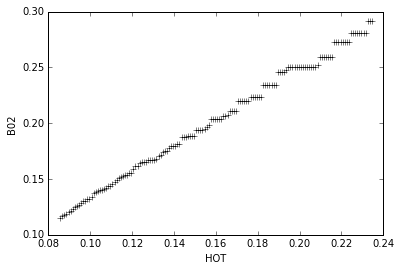

In [49]:
plt.plot(np.array(ints), lbs, '+k')
plt.xlabel('HOT')
plt.ylabel('B02')

In [50]:
adjust = lbs[lbs>0] - lbs[0]
adjust

array([ 0.    ,  0.0012,  0.0022,  0.0035,  0.0048,  0.0064,  0.0076,
        0.0092,  0.0105,  0.0117,  0.0136,  0.0146,  0.0153,  0.017 ,
        0.017 ,  0.0182,  0.0219,  0.0227,  0.0236,  0.0247,  0.0249,
        0.0257,  0.0269,  0.0281,  0.0288,  0.0304,  0.032 ,  0.0335,
        0.0359,  0.0364,  0.0375,  0.0385,  0.0385,  0.0401,  0.0401,
        0.0434,  0.0463,  0.0463,  0.0488,  0.0501,  0.0501,  0.0501,
        0.052 ,  0.052 ,  0.052 ,  0.052 ,  0.0522,  0.0552,  0.0559,
        0.0589,  0.0598,  0.0598,  0.0625,  0.0642,  0.0642,  0.0642,
        0.066 ,  0.066 ,  0.0719,  0.0719,  0.0722,  0.0733,  0.0733,
        0.0733,  0.0733,  0.0785,  0.0786,  0.0786,  0.0786,  0.0793,
        0.0814,  0.0834,  0.0882,  0.0889,  0.0889,  0.0889,  0.0889,
        0.0889,  0.0912,  0.0912,  0.0924,  0.0955,  0.0955,  0.0955,
        0.0955,  0.105 ,  0.105 ,  0.105 ,  0.105 ,  0.105 ,  0.105 ,
        0.1081,  0.1081,  0.1081,  0.1081,  0.1081,  0.1081,  0.1191,
        0.1191,  0.1

LinregressResult(slope=1.1541856971420952, intercept=-0.096809130112449432, rvalue=0.99836163126889343, pvalue=8.57279575914392e-186, stderr=0.0054375068256889494)


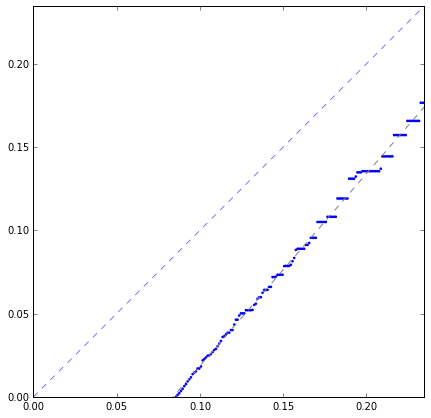

In [51]:
y,x = np.array(ints)[lbs>0], adjust
fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, s=7, edgecolor='')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)

r = scipy.stats.linregress(y,x)
print r

In [52]:
test = np.zeros_like(b2)
test[:] = np.nan
#hz = test[rr[~cl], cc[~cl]]
test[hot>0.0856] = hot[hot>0.0856]*r.slope + r.intercept
test[hot<0.0856] = 0
#test[rr[cl], cc[cl]] = 0

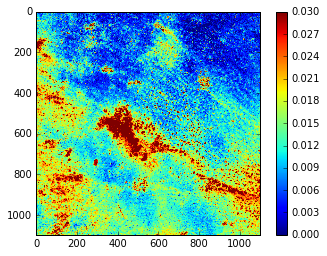

In [53]:
plt.imshow(test[::10,::10], vmax=0.03)
plt.colorbar()

In [54]:
corrected = b2-test

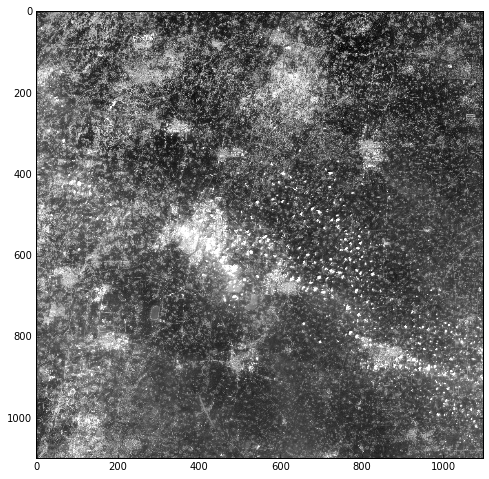

In [56]:
plt.figure(figsize = (8,8))
plt.imshow(b2[::10,::10], vmin = 0, vmax = 0.2, cmap = 'gray')

In [59]:
plt.figure(figsize=(8,8))
plt.imshow(b2[10000:,1000:2000],vmin = 0, vmax = 0.2,  cmap = 'gray')

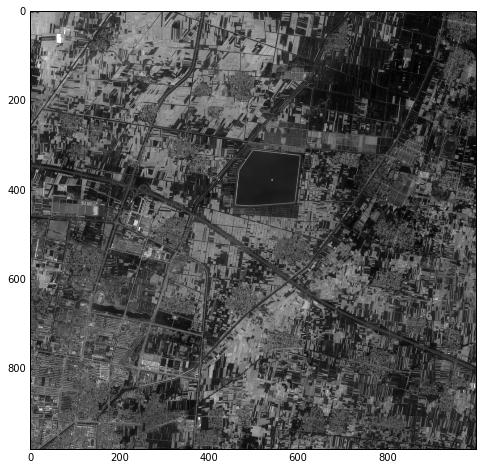

In [58]:
plt.figure(figsize=(8,8))
plt.imshow(corrected[10000:,1000:2000],vmin = 0, vmax = 0.2,  cmap = 'gray')

In [60]:
tiff.imsave('corband2.tif', corrected)

In [ ]:
#im = tiff.imread('corband2.tif', key=0)

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in less
/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in greater


LinregressResult(slope=1.5127673486027269, intercept=-0.15865050482460957, rvalue=0.945219000924446, pvalue=0.0, stderr=0.00377040767093266)


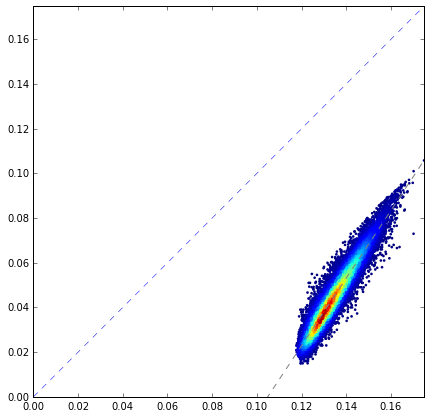

In [61]:
data = parallel_rw_pkl(None, 'partrmhzb2_modis', 'r')
data = np.array(data)
a = []
for i in data:
    a+=i
a = np.array(a).T
y,x = a[0], a[1]
dif = x-y
sigma = np.nanstd(dif)
mean = np.nanmean(dif)

Thr_sigma = 3.*sigma
inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

x = x[inliers]
y = y[inliers]
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
xy = np.vstack([y,x])
z = gaussian_kde(xy)(xy)

fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, c=z, s=7, edgecolor='')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
r = scipy.stats.linregress(y,x)
print r

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in less
/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in greater


LinregressResult(slope=1.4786057827575458, intercept=-0.15442497545433731, rvalue=0.91802030210885188, pvalue=0.0, stderr=0.0033570791461860622)


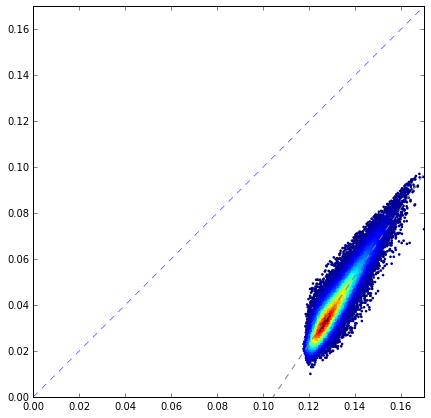

In [64]:
data = parallel_rw_pkl(None, 'rmhazeb2_modis', 'r')
data = np.array(data)
a = []
for i in data:
    a+=i
a = np.array(a).T
y,x = a[0], a[1]
dif = x-y
sigma = np.nanstd(dif)
mean = np.nanmean(dif)

Thr_sigma = 3.*sigma
inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

x = x[inliers]
y = y[inliers]
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
xy = np.vstack([y,x])
z = gaussian_kde(xy)(xy)

fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, c=z, s=7, edgecolor='')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
r = scipy.stats.linregress(y,x)
print r

#### B04

LinregressResult(slope=0.69428571428571406, intercept=-0.060605142857142837, rvalue=0.96732940132507828, pvalue=0.0015836162505930634, stderr=0.090981047589089453)


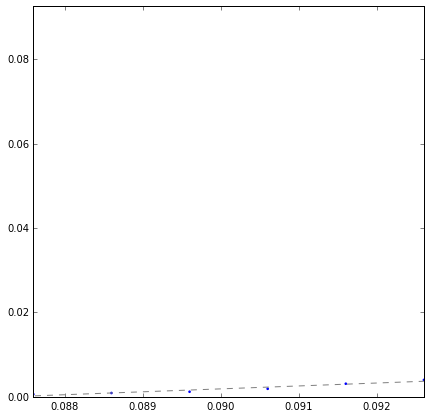

In [154]:
ints = [0.0856+i*0.001 for i in range(8)]
lbs = np.array([np.histogram(b4[hot>i])[1][0] for i in ints])

adjust = lbs[lbs>0] - lbs[0]
adjust

adjust[adjust>0]

y,x = np.array(ints)[adjust>0], adjust[adjust>0]
fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)
minval = np.nanmin(np.nanmin(y),np.nanmin(x))
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, s=7, edgecolor='')
#plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(np.nanmin(y), maxval)
plt.ylim(0, maxval)

r = scipy.stats.linregress(y,x)
print r

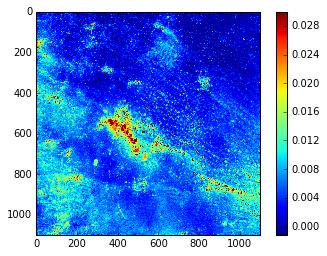

In [155]:
test = np.zeros_like(b2)
test[:] = np.nan
#hz = test[rr[~cl], cc[~cl]]
test[hot>0.0856] = hot[hot>0.0856]*r.slope + r.intercept
test[hot<0.0856] = 0
#test[rr[cl], cc[cl]] = 0

plt.imshow(test[::10,::10], vmax=0.03)
plt.colorbar()

In [143]:
corrected = b4-test

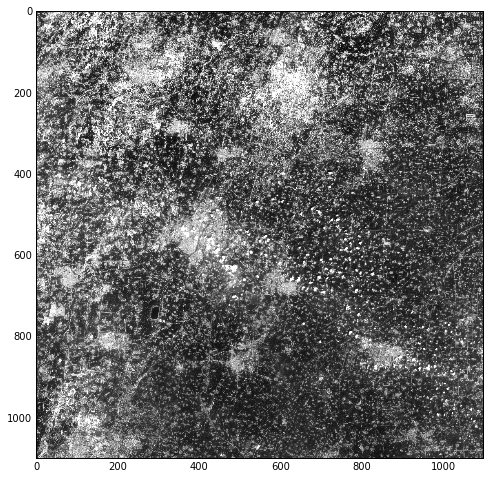

In [144]:
plt.figure(figsize = (8,8))
plt.imshow(b4[::10,::10], vmin = 0, vmax = 0.2, cmap = 'gray')

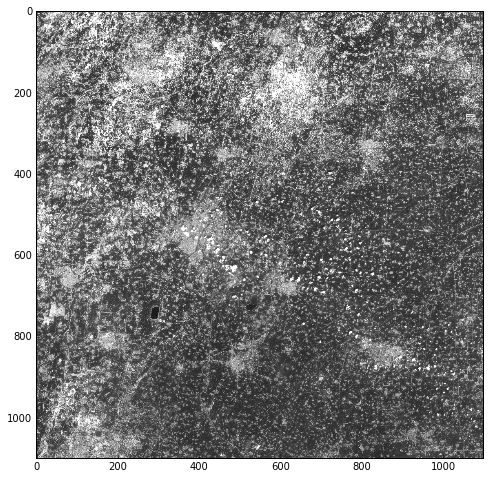

In [145]:
plt.figure(figsize = (8,8))
plt.imshow(corrected[::10,::10],vmin = 0, vmax = 0.2, cmap = 'gray')

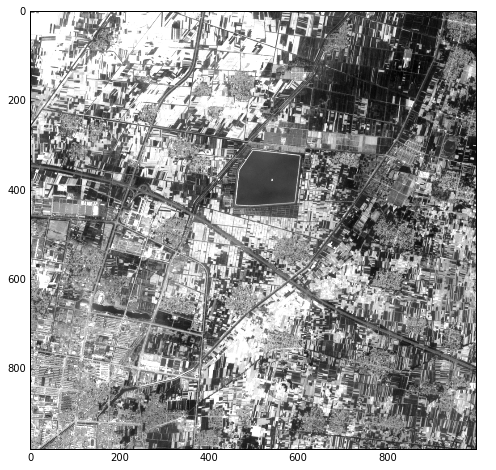

In [146]:
plt.figure(figsize=(8,8))
plt.imshow(b4[10000:,1000:2000], vmin = 0, vmax = 0.2,  cmap = 'gray')

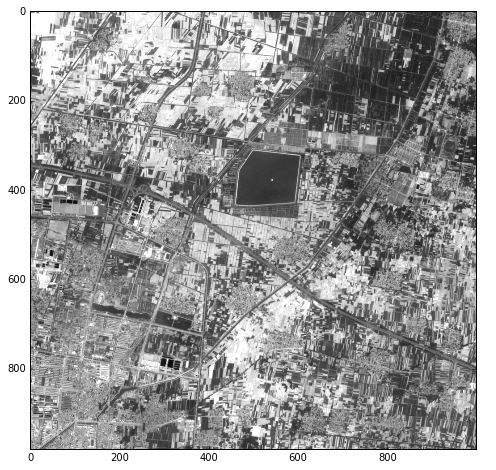

In [147]:
plt.figure(figsize=(8,8))
plt.imshow(corrected[10000:,1000:2000], vmin = 0, vmax = 0.2,  cmap = 'gray')

In [148]:
tiff.imsave('corband4.tif', corrected)

In [160]:
for i in ('rmhazeb4_modis', 'partrmhzb4_modis'):
    data = parallel_rw_pkl(None, i, 'r')
    data = np.array(data)
    a = []
    for i in data:
        a+=i
    a = np.array(a).T
    y,x = a[0], a[1]
    dif = x-y
    sigma = np.nanstd(dif)
    mean = np.nanmean(dif)

    Thr_sigma = 3.*sigma
    inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

    x = x[inliers]
    y = y[inliers]
    maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
    xy = np.vstack([y,x])
    z = gaussian_kde(xy)(xy)

    fit = np.polyfit(y,x,1)
    fit_fn = np.poly1d(fit)

    fig, ax = plt.subplots(figsize = (7,7))
    ax.scatter(y, x, c=z, s=7, edgecolor='')
    plt.plot([0,1],[0.,1], '--',linewidth=0.5)
    plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    plt.xlim(0, maxval)
    plt.ylim(0, maxval)
    r = scipy.stats.linregress(y,x)
    print r

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in less
/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater


LinregressResult(slope=1.1516843464125812, intercept=-0.049578269254413679, rvalue=0.95118060040606456, pvalue=0.0, stderr=0.0019607876120515864)
LinregressResult(slope=1.1697067081329562, intercept=-0.051978316184259452, rvalue=0.96263391205624249, pvalue=0.0, stderr=0.0023724966948744492)


#### B03

In [4]:
bands = readfile([3, 8], 'data/50SMG20165100' )

data/50SMG20165100auxiliaryECMWFT
data/50SMG20165100metadata.xml


In [5]:
b3, b8 = bands['B03'], bands['B08']

[ 0.      0.0002  0.0006  0.0009  0.0027  0.0043  0.0043  0.0055  0.0058
  0.007 ]
LinregressResult(slope=0.8933333333333342, intercept=-0.077458222222222289, rvalue=0.98337312802060239, pvalue=1.9201387032783536e-06, stderr=0.062352471385107723)


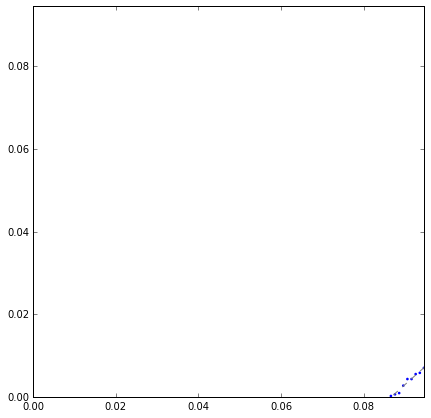

In [168]:
ints = [0.0856+i*0.001 for i in range(10)]
lbs = np.array([np.histogram(b3[hot>i])[1][0] for i in ints])

adjust = lbs[lbs>0] - lbs[0]
print adjust

adjust[adjust>0]

y,x = np.array(ints)[adjust>0], adjust[adjust>0]
fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)
minval = np.nanmin(np.nanmin(y),np.nanmin(x))
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, s=7, edgecolor='')
#plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)

r = scipy.stats.linregress(y,x)
print r

In [169]:
test = np.zeros_like(b2)
test[:] = np.nan
#hz = test[rr[~cl], cc[~cl]]
test[hot>0.0856] = hot[hot>0.0856]*r.slope + r.intercept
test[hot<0.0856] = 0
#test[rr[cl], cc[cl]] = 0

plt.imshow(test[::10,::10], vmax=0.03)
plt.colorbar()

In [163]:
corrected = b3-test

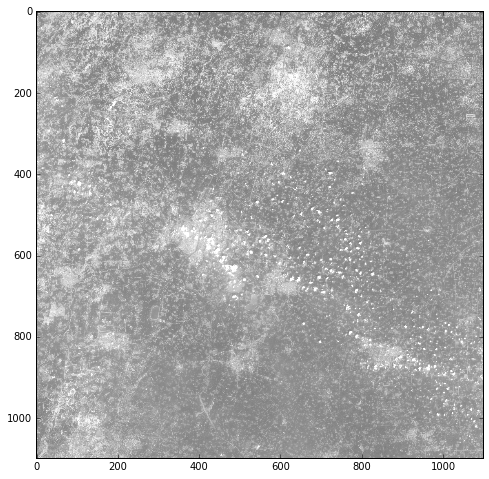

In [172]:
plt.figure(figsize = (8,8))
plt.imshow(b3[::10,::10],vmin = 0, vmax = 0.2, cmap = 'gray')

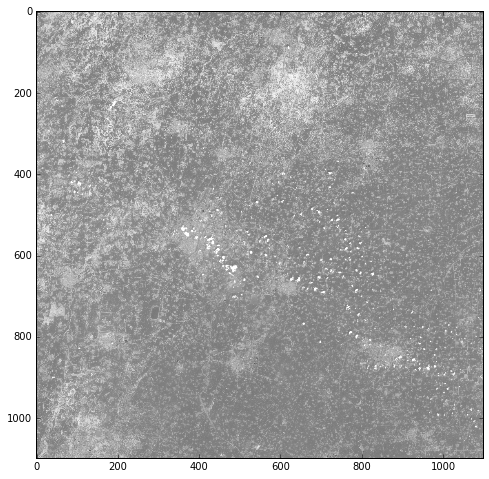

In [176]:
plt.figure(figsize = (8,8))
plt.imshow(corrected[::10,::10],vmin = 0, vmax = 0.2, cmap = 'gray')

In [177]:
tiff.imsave('corband3.tif', corrected)

In [197]:
for i in ('rmhazeb3_modis', 'partrmhzb3_modis'):
    data = parallel_rw_pkl(None, i, 'r')
    data = np.array(data)
    a = []
    for i in data:
        a+=i
    a = np.array(a).T
    y,x = a[0], a[1]
    dif = x-y
    sigma = np.nanstd(dif)
    mean = np.nanmean(dif)

    Thr_sigma = 3.*sigma
    inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

    x = x[inliers]
    y = y[inliers]
    maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
    xy = np.vstack([y,x])
    z = gaussian_kde(xy)(xy)

    fit = np.polyfit(y,x,1)
    fit_fn = np.poly1d(fit)

    fig, ax = plt.subplots(figsize = (7,7))
    ax.scatter(y, x, c=z, s=7, edgecolor='')
    plt.plot([0,1],[0.,1], '--',linewidth=0.5)
    plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    plt.xlim(0, maxval)
    plt.ylim(0, maxval)
    r = scipy.stats.linregress(y,x)
    print r

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in less
/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater


LinregressResult(slope=1.3631774312536582, intercept=-0.085944868673159591, rvalue=0.9273550955335581, pvalue=0.0, stderr=0.0028893999505685696)
LinregressResult(slope=1.3936486178521292, intercept=-0.089940780816850779, rvalue=0.94889953357355172, pvalue=0.0, stderr=0.0033446884638215404)


#### B08

In [143]:
ints = [0.0856+i*0.001 for i in range(100)]
lbs = np.array([np.histogram(b8[hot>i])[1][0] for i in ints])

In [7]:
plt.plot(lbs, 'k+')

[ 0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.0002  0.0009  0.0013  0.002   0.0054  0.008
  0.008   0.0087  0.0094  0.0108  0.0114  0.015   0.0158  0.0158  0.0158
  0.0158  0.016   0.0169  0.0183  0.0207  0.0263  0.029   0.0363  0.04
  0.0409  0.0436  0.0463  0.0471  0.0511  0.0549  0.0568  0.0601  0.061
  0.0643  0.0684  0.0696  0.0696  0.0733  0.0765  0.0765  0.0765  0.0868
  0.0868  0.0972  0.0972  0.0981  0.1083  0.1083  0.1097  0.1097  0.1097
  0.121   0.121   0.121   0.121   0.1364  0.1364  0.1364  0.1364  0.1578
  0.1578  0.1578  0.1578  0.1596  0.1625  0.1712  0.1712  0.1712  0.1712
  0.1712  0.1782  0.1782  0.1862  0.1862  0.1862  0.1862  0.1862]
LinregressResult(slope=2.7450943793049056, intercept=-0.31772434249960568, rvalue=0.9913884012526718, pvalue=5.6313251338406314e-68, stderr=0.041869974354115803)


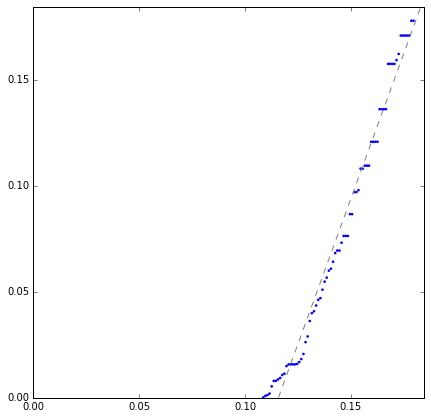

In [8]:
ints = [0.0856+i*0.001 for i in range(0)]
lbs = np.array([np.histogram(b8[hot>i])[1][0] for i in ints])

adjust = lbs[lbs>0] - lbs[0]
print adjust

adjust[adjust>0]

y,x = np.array(ints)[adjust>0], adjust[adjust>0]
fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)
minval = np.nanmin(np.nanmin(y),np.nanmin(x))
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, s=7, edgecolor='')
#plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)

r = scipy.stats.linregress(y,x)
print r

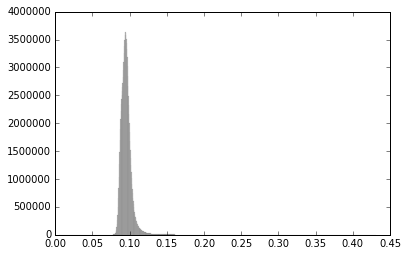

In [85]:
hist = plt.hist(hot.ravel(), bins=1000, linewidth=0.1, color='gray', alpha=0.5)

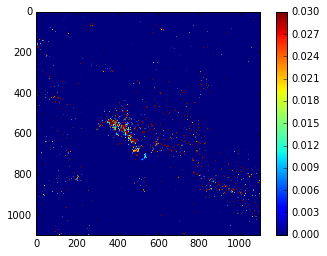

In [86]:
test = np.zeros_like(b8)
test[:] = np.nan
#hz = test[rr[~cl], cc[~cl]]
test[hot>0.0856] = hot[hot>0.0856]*r.slope + r.intercept
test[hot<0.0856] = 0
#test[rr[cl], cc[cl]] = 0
test[test<0] = 0

plt.imshow(test[::10,::10], vmax=0.03)
plt.colorbar()

In [38]:
test.mean() - 0.05*test.std()

0.00079148391876474489

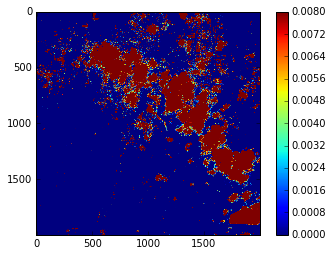

In [48]:
plt.imshow(test[5000:7000, 3000:5000], vmax=0.008)
plt.colorbar()

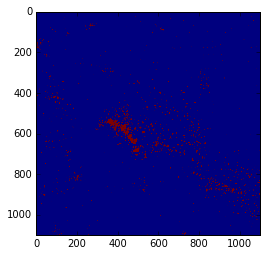

In [47]:
plt.imshow((test>0.008)[::10,::10])

In [ ]:
tiff.imsave('corband3.tif', corrected)

In [60]:
(test.mean()+3*test.std())

0.059423809184666304

In [118]:
cloud = test > 0.15
struct1 = ndimage.generate_binary_structure(2, 1)
cloud = bd(cloud, structure=struct1, iterations=3).astype(cloud.dtype)

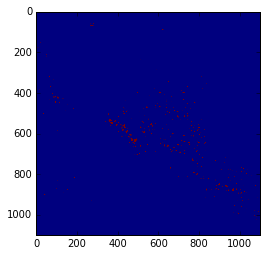

In [119]:
plt.imshow(cloud[::10,::10])

In [120]:
parallel_rw_pkl(cloud, 'newcloudm', 'w')

In [93]:
tiff.imsave('cloudmask.tif', cloud.astype('int'))

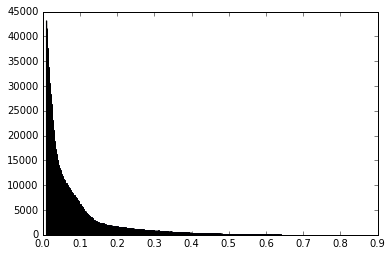

In [30]:
hist = plt.hist(test[test>0.01],bins=1000)

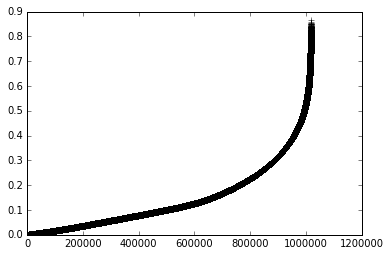

In [14]:
plt.plot(np.unique(test), 'k+')

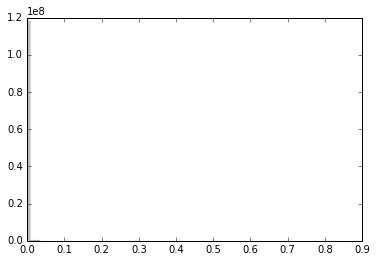

In [99]:
hist = plt.hist(test.ravel(), bins = 100, linewidth=0.1, alpha=0.5, color='gray')

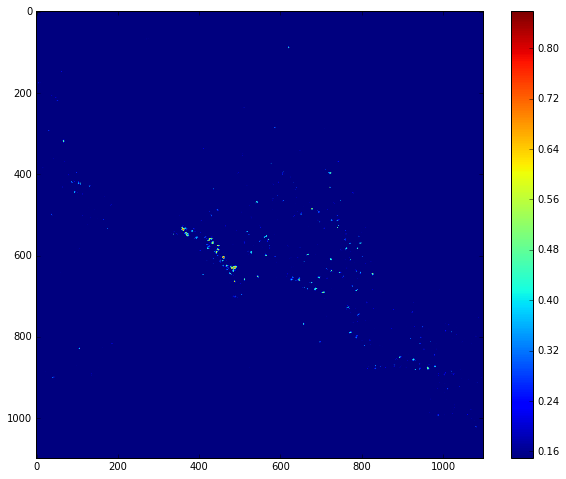

In [108]:
plt.figure(figsize=(10,8))
plt.imshow(test[::10,::10], vmin=0.15)
plt.colorbar()

In [94]:
corrected = b8-test

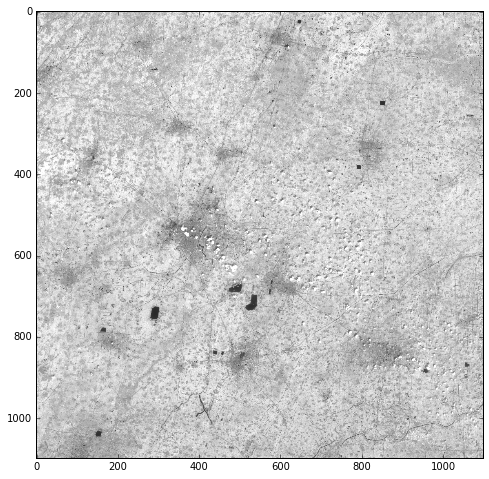

In [95]:
plt.figure(figsize = (8,8))
plt.imshow(b8[::10,::10],vmin = 0, vmax =0.4, cmap = 'gray')

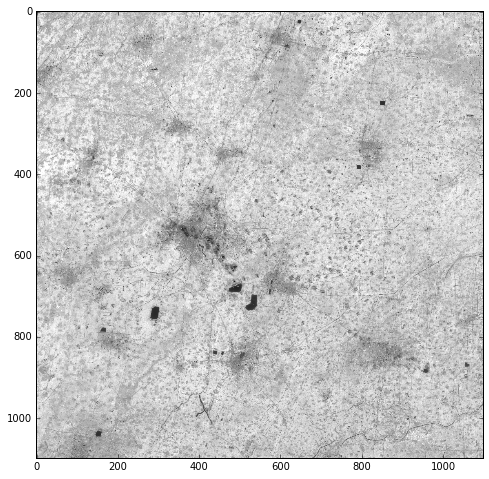

In [96]:
plt.figure(figsize = (8,8))
plt.imshow(corrected[::10,::10],vmin = 0, vmax =0.4, cmap = 'gray')

In [111]:
NDVI = (b8-b4)/(b4+b8)

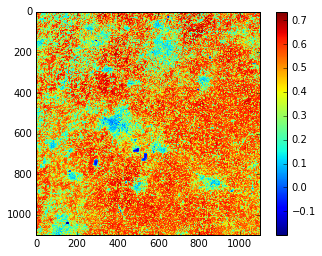

In [113]:
plt.imshow(NDVI[::10,::10])
plt.colorbar()

In [114]:
data = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        data[i,j] = NDVI[1000*i:1000*i+1000, 1000*j:1000*j+1000].mean()

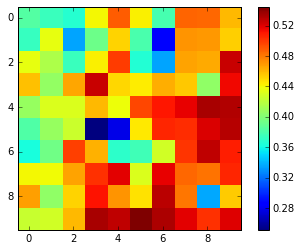

In [116]:
plt.imshow(data, interpolation='Nearest')
plt.colorbar()

In [195]:
tiff.imsave('corband8.tif', corrected)

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in less
/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater


LinregressResult(slope=0.99839895869021245, intercept=0.018980355930589554, rvalue=0.86446776071102405, pvalue=0.0, stderr=0.0030480803430441949)
LinregressResult(slope=1.0328899473966617, intercept=0.0045529604346827846, rvalue=0.89885141982011418, pvalue=0.0, stderr=0.0036329551315597728)


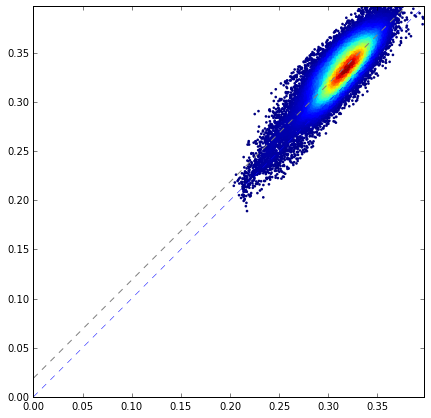

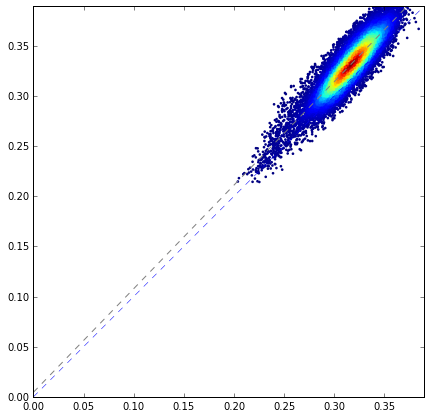

In [198]:
for i in ('rmhazeb8_modis', 'partrmhzb8_modis'):
    data = parallel_rw_pkl(None, i, 'r')
    data = np.array(data)
    a = []
    for i in data:
        a+=i
    a = np.array(a).T
    y,x = a[0], a[1]
    dif = x-y
    sigma = np.nanstd(dif)
    mean = np.nanmean(dif)

    Thr_sigma = 3.*sigma
    inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

    x = x[inliers]
    y = y[inliers]
    maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
    xy = np.vstack([y,x])
    z = gaussian_kde(xy)(xy)

    fit = np.polyfit(y,x,1)
    fit_fn = np.poly1d(fit)

    fig, ax = plt.subplots(figsize = (7,7))
    ax.scatter(y, x, c=z, s=7, edgecolor='')
    plt.plot([0,1],[0.,1], '--',linewidth=0.5)
    plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    plt.xlim(0, maxval)
    plt.ylim(0, maxval)
    r = scipy.stats.linregress(y,x)
    print r

A comparison of new generated cloud mask that used for the linear regression.

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in less
/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater


LinregressResult(slope=0.95728870719740711, intercept=0.032580381221109678, rvalue=0.88487638481328268, pvalue=0.0, stderr=0.0026466348865907909)
LinregressResult(slope=0.9985079587497252, intercept=0.01605702181910601, rvalue=0.90576446726065341, pvalue=0.0, stderr=0.0033733797179084711)


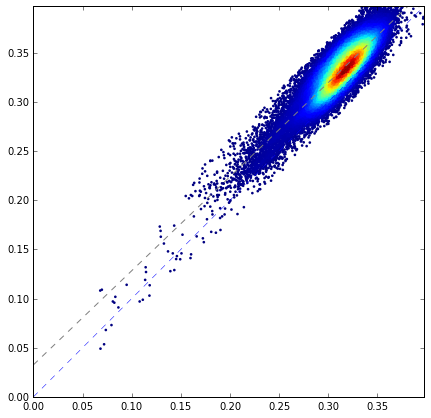

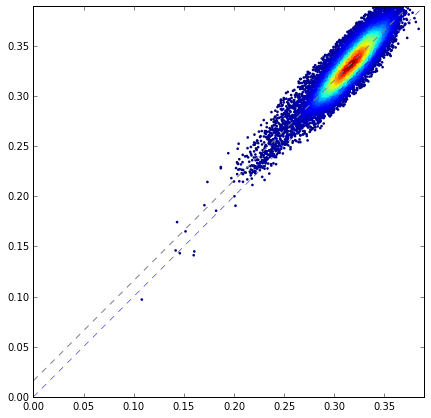

In [121]:
for i in ('crmhazeb8_modis', 'cpartrmhzb8_modis'):
    data = parallel_rw_pkl(None, i, 'r')
    data = np.array(data)
    a = []
    for i in data:
        a+=i
    a = np.array(a).T
    y,x = a[0], a[1]
    dif = x-y
    sigma = np.nanstd(dif)
    mean = np.nanmean(dif)

    Thr_sigma = 3.*sigma
    inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

    x = x[inliers]
    y = y[inliers]
    maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
    xy = np.vstack([y,x])
    z = gaussian_kde(xy)(xy)

    fit = np.polyfit(y,x,1)
    fit_fn = np.poly1d(fit)

    fig, ax = plt.subplots(figsize = (7,7))
    ax.scatter(y, x, c=z, s=7, edgecolor='')
    plt.plot([0,1],[0.,1], '--',linewidth=0.5)
    plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    plt.xlim(0, maxval)
    plt.ylim(0, maxval)
    r = scipy.stats.linregress(y,x)
    print r

#### B8A

In [123]:
def ScaleExtent(data, shape): # used for unifine different array,

    re = int(shape[0]/(data.shape[0]))

    a = np.repeat(np.repeat(data, re, axis = 1), re, axis =0)
    
    if (re*(data.shape[0])-shape[0]) != 0:
        extended = np.zeros(shape)
        extended[:re*(data.shape[0]),:re*(data.shape[0])] = a
        extended[re*(data.shape[0]):,re*(data.shape[0]):] = a[re*(data.shape[0])-shape[0]:, re*(data.shape[0])-shape[0]]
        return extended
    else:
        return a

In [122]:
bands = readfile([13, ], 'data/50SMG20165100' )

data/50SMG20165100auxiliaryECMWFT
data/50SMG20165100metadata.xml


In [124]:
b8a = ScaleExtent(bands['B8A'], (10980,10980))

[ 0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.0003  0.0008  0.0023  0.0036  0.0082
  0.0087]
LinregressResult(slope=1.871428571428575, intercept=-0.20580380952380989, rvalue=0.95852233023196387, pvalue=0.0025449166029076591, stderr=0.27823545062841254)


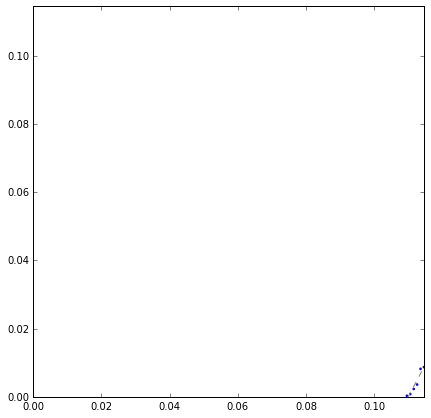

In [137]:
ints = [0.0856+i*0.001 for i in range(30)]
lbs = np.array([np.histogram(b8a[hot>i])[1][0] for i in ints])

adjust = lbs[lbs>0] - lbs[0]
print adjust

adjust[adjust>0]

y,x = np.array(ints)[adjust>0], adjust[adjust>0]
fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)
minval = np.nanmin(np.nanmin(y),np.nanmin(x))
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, s=7, edgecolor='')
#plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
r = scipy.stats.linregress(y,x)
print r

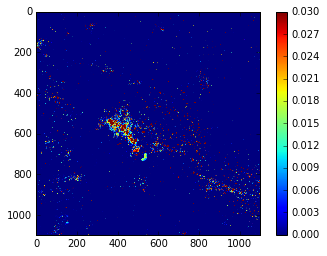

In [138]:
test = np.zeros_like(b8)
test[:] = np.nan
#hz = test[rr[~cl], cc[~cl]]
test[hot>0.0856] = hot[hot>0.0856]*r.slope + r.intercept
test[hot<0.0856] = 0
#test[rr[cl], cc[cl]] = 0
test[test<0] = 0
plt.imshow(test[::10,::10], vmax=0.03)
plt.colorbar()

In [139]:
corrected = b8a - test

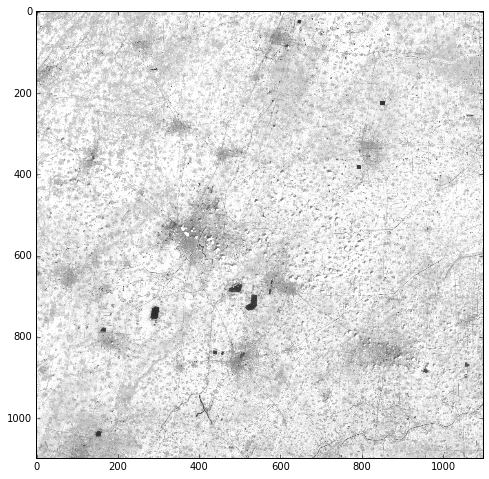

In [140]:
plt.figure(figsize = (8,8))
plt.imshow(b8a[::10,::10],vmin = 0, vmax =0.4, cmap = 'gray')

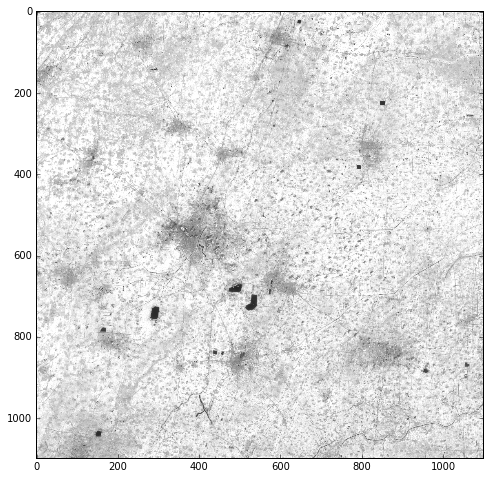

In [141]:
plt.figure(figsize = (8,8))
plt.imshow(corrected[::10,::10],vmin = 0, vmax =0.4, cmap = 'gray')

In [144]:
tiff.imsave('corband8a.tif', corrected)

In [145]:
for i in ('crmhazeb8a_modis', 'cpartrmhzb8a_modis'):
    data = parallel_rw_pkl(None, i, 'r')
    data = np.array(data)
    a = []
    for i in data:
        a+=i
    a = np.array(a).T
    y,x = a[0], a[1]
    dif = x-y
    sigma = np.nanstd(dif)
    mean = np.nanmean(dif)

    Thr_sigma = 3.*sigma
    inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

    x = x[inliers]
    y = y[inliers]
    maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
    xy = np.vstack([y,x])
    z = gaussian_kde(xy)(xy)

    fit = np.polyfit(y,x,1)
    fit_fn = np.poly1d(fit)

    fig, ax = plt.subplots(figsize = (7,7))
    ax.scatter(y, x, c=z, s=7, edgecolor='')
    plt.plot([0,1],[0.,1], '--',linewidth=0.5)
    plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    plt.xlim(0, maxval)
    plt.ylim(0, maxval)
    r = scipy.stats.linregress(y,x)
    print r

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in less
/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater


LinregressResult(slope=0.86311165773627441, intercept=0.030217336337496348, rvalue=0.89145313211262278, pvalue=0.0, stderr=0.0023048397787732823)
LinregressResult(slope=0.8955793781225333, intercept=0.015487548220324165, rvalue=0.90887083632477927, pvalue=0.0, stderr=0.0029686099487612094)


#### Apply new cloud map with haze removed image to the regression

In [148]:
b4_modis = parallel_rw_pkl(None, 'Newopb4_modis', 'r')
b2_modis = parallel_rw_pkl(None, 'Newopb2_modis', 'r')
b3_modis = parallel_rw_pkl(None, 'Newopb3_modis', 'r')
b8_modis = parallel_rw_pkl(None, 'Newopb8_modis', 'r')
b8a_modis = parallel_rw_pkl(None, 'Newopb8a_modis', 'r')
b11_modis = parallel_rw_pkl(None, 'Newopb11_modis', 'r')
b12_modis = parallel_rw_pkl(None, 'Newopb12_modis', 'r')

In [149]:
bands = []
for j in [b2_modis,b3_modis,b4_modis,b8_modis,b8a_modis,b11_modis,b12_modis]:
    
    data = []
    for i in j:
        data+=i
    bands.append(data)
names = ('SB2_MB3,SB3_MB4,SB4_MB1,SB8_MB2,SB8a_MB2,SB11_MB6,SB12_MB7').split(',')

In [150]:
fig = plt.figure
gs = gridspec.GridSpec(2,4)  # generate a grid space
fig = plt.figure(figsize=(16,8))

for i in range(7):
    ax = fig.add_subplot(gs[i])
    
    data = np.array(bands[i])
    maxval = np.nanmax(data)
    m = data[:,0][~(np.isnan(data[:,1])|np.isnan(data[:,0]))]
    s = data[:,1][~(np.isnan(data[:,1])|np.isnan(data[:,0]))]
    
    dif = m-s
    sigma = np.nanstd(dif)
    mean = np.nanmean(dif)
    
    Thr_sigma = 3.*sigma
    inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)
    
    m = m[inliers]
    s = s[inliers]

    r = scipy.stats.linregress(m,s) # all of the data composed of mean value and brdf
    fit = np.polyfit(m,s,1)
    fit_fn = np.poly1d(fit)
    #plt.figure(figsize = (7,7))
    xy = np.vstack([m,s])
    z = gaussian_kde(xy)(xy)
    ax.scatter(m,s, c=z, s=4, edgecolor='')
    ax.plot([0,1],[0.,1], '--',linewidth=0.5)
    ax.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
    ax.set_xlim(0, maxval)
    ax.set_ylim(0, maxval)
    ax.set_title('%s'%names[i]+' slop=%.2f'%r.slope+' r=%.2f'%r.rvalue+' inter=%.2f'%r.intercept)
plt.tight_layout()